# Data Analysis Notebook

This notebook is designed for the purpose of analyzing data obtained from the Hydra cluster. It provides a set of tools and techniques for performing data analysis tasks and extracting insights from the data.


In [132]:
Sys.CPU_THREADS

6

In [133]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

exp_index = 4
dir_extension = ""
file_prefix = ""
filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
data = h5read(filename, "/")

for key in keys(data)
    println("$key: $(data[key])")
end


In [134]:
dir_extension = ""
file_prefix = ""
all_data = []
for exp_index in 1:400
    filename = "../Remote-Hydra/Toric_Code/data$(dir_extension)/$(file_prefix)TEE_exp:$(exp_index).h5"
    if ispath(filename)
        data = h5read(filename, "/")
        # print(data["L"],",")
        push!(all_data, data)
    end
end
print("data sets read: ",length(all_data))

In [135]:
model_data["t_mmt"]

14-element Vector{Int64}:
      1
     10
    100
   1000
  10000
  20000
  30000
  40000
  50000
  60000
  70000
  80000
  90000
 100000

In [136]:
avr_back = 2

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        for i in 1:avr_back
            push!(Observables_t_p, data["TEE"][end+1-i, :, :])
        end
    end
end
Observables_t_p_15  = cat(dims= 3, Observables_t_p...) # implement time averaging

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 18
#         push!(Observables_t_p, data["TEE"][:, :, :])
#     end
# end
# Observables_t_p_18  = cat(dims= 4, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 21
#         push!(Observables_t_p, data["TEE"][:, :, :])
#     end
# end
# Observables_t_p_21  = cat(dims= 4, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 24
#         push!(Observables_t_p, data["TEE"][:, :, :])
#     end
# end
# Observables_t_p_24  = cat(dims= 4, Observables_t_p...);

TEE_dict = Dict(
    "L15" => Observables_t_p_15,
    #"L18" => Observables_t_p_18,
    #"L21" => Observables_t_p_21,
    #"L24" => Observables_t_p_24
)

TEE_means = Dict(
    "L15" => mean(TEE_dict["L15"], dims = 3),
    #"L18" => mean(TEE_dict["L18"], dims = 4),
    #"L21" => mean(TEE_dict["L21"], dims = 4),
    #"L24" => mean(TEE_dict["L24"], dims = 4)
)

TEE_vars = Dict(
    "L15" => var(TEE_dict["L15"], dims = 3),
    #"L18" => var(TEE_dict["L18"], dims = 4),
    #"L21" => var(TEE_dict["L21"], dims = 4),
    #"L24" => var(TEE_dict["L24"], dims = 4)
)

TEE_err = Dict(
    "L15" => std(TEE_dict["L15"], dims = 3) ./ sqrt(size(TEE_dict["L15"], 3)),
    #"L18" => std(TEE_dict["L18"], dims = 4) ./ sqrt(size(TEE_dict["L18"], 4)),
    #"L21" => std(TEE_dict["L21"], dims = 4) ./ sqrt(size(TEE_dict["L21"], 4)),
    #"L24" => std(TEE_dict["L24"], dims = 4) ./ sqrt(size(TEE_dict["L24"], 4))
)

TEE_medians = Dict(
    "L15" => median(TEE_dict["L15"], dims = 3),
    #"L18" => median(TEE_dict["L18"], dims = 4),
    #"L21" => median(TEE_dict["L21"], dims = 4),
    #"L24" => median(TEE_dict["L24"], dims = 4)
)

TEE_Stats = Dict(
    "mean" => TEE_means,
    "var" => TEE_vars,
    "err" => TEE_err,
    "median" => TEE_medians
)

Dict{String, Dict{String, Array{Float64, 3}}} with 4 entries:
  "median" => Dict("L15"=>[2.0 2.0 … 0.0 0.0; 2.0 2.0 … 0.0 NaN; … ; 2.0 0.0 … …
  "err"    => Dict("L15"=>[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 NaN; … ; 0.055672 0…
  "mean"   => Dict("L15"=>[2.0 2.0 … 0.0 0.0; 2.0 2.0 … 0.0 NaN; … ; 2.385 -0.0…
  "var"    => Dict("L15"=>[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 NaN; … ; 0.619874 0…

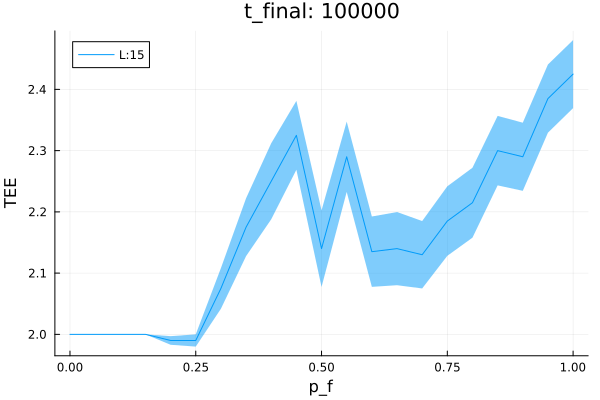

In [137]:
stat = "mean"
ribbon = "err"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][:, 1], ribbon=TEE_Stats[ribbon]["L15"][:, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


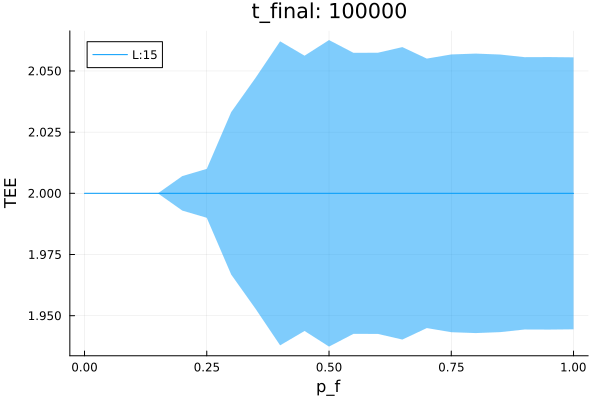

In [138]:
stat = "median"
ribbon = "err"

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][:, 1], ribbon=TEE_Stats[ribbon]["L15"][:, 1], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


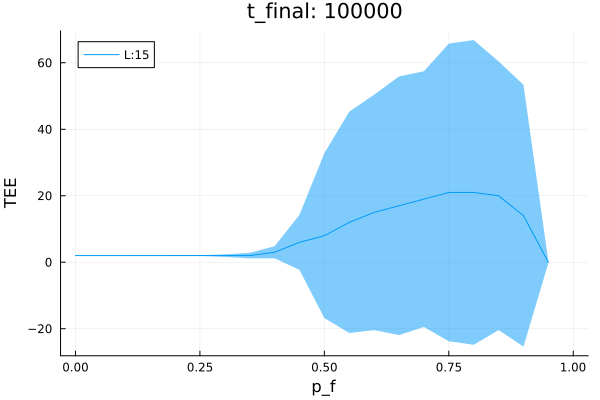

In [153]:
stat = "median"
ribbon = "var"
p_b_ind = 2

plot(model_data["p_f_arr"], TEE_Stats[stat]["L15"][:, p_b_ind], ribbon=TEE_Stats[ribbon]["L15"][:, p_b_ind], label="L:$(15)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L18"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, :, 1], label="L:$(18)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L21"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, :, 1], label="L:$(21)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_f_arr"], TEE_Stats[stat]["L24"][end-t_cut, :, 1], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, :, 1], label="L:$(24)", xlabel="p_f", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


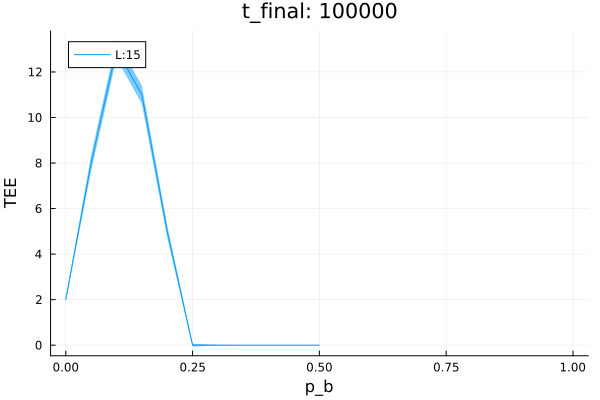

In [140]:
p_f_cut = 11
stat = "median"
ribbon = "err"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


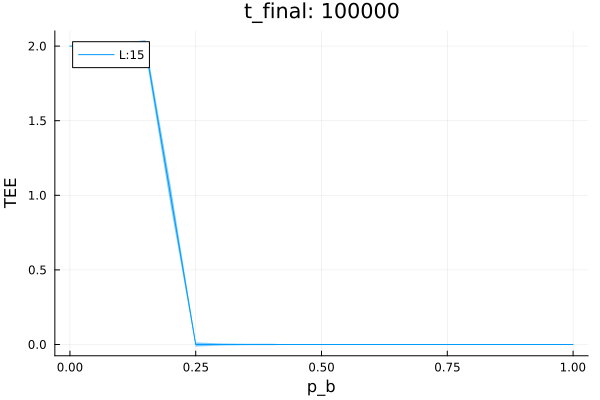

In [141]:
p_f_cut = 1
stat = "median"
ribbon = "err"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


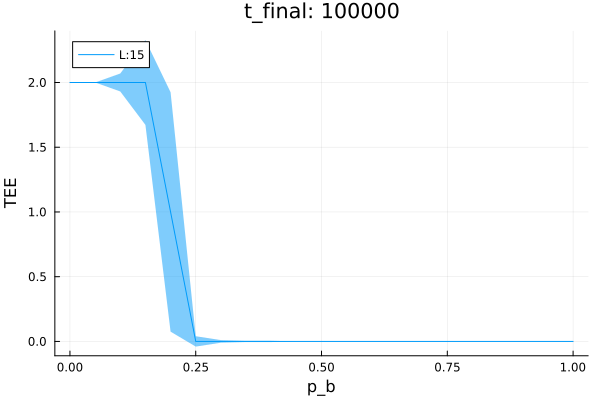

In [142]:
p_f_cut = 1
stat = "median"
ribbon = "var"

plot(model_data["p_b_arr"], TEE_Stats[stat]["L15"][p_f_cut, :], ribbon=TEE_Stats[ribbon]["L15"][p_f_cut, :], label="L:$(15)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft) 
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L18"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L18"][end-t_cut, p_f_cut, :], label="L:$(18)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L21"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L21"][end-t_cut, p_f_cut, :], label="L:$(21)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)
#plot!(model_data["p_b_arr"], TEE_Stats[stat]["L24"][end-t_cut, p_f_cut, :], ribbon=TEE_Stats[ribbon]["L24"][end-t_cut, p_f_cut, :], label="L:$(24)", xlabel="p_b", ylabel="TEE", title="t_final: $(model_data["t_mmt"][end-t_cut])", legend=:topleft)


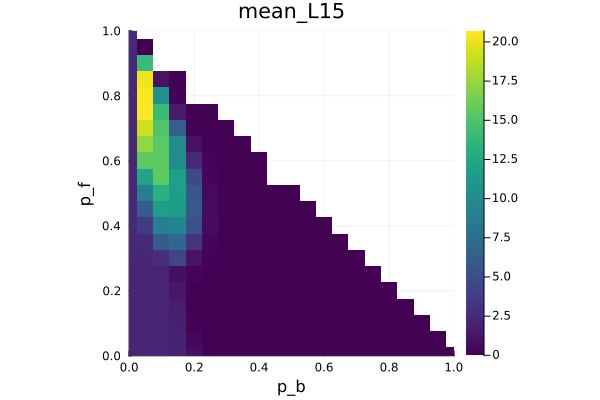

In [143]:
stat = "mean"
L = "L15"

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], TEE_Stats[stat][L][:, :], xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis, aspect_ratio=1, xlim = (0, 1), ylim = (0, 1))



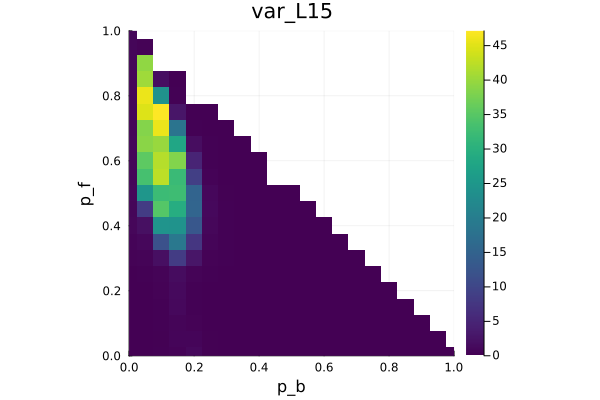

In [144]:
stat = "var"
L = "L15"

heatmap(model_data["p_b_arr"], model_data["p_f_arr"], TEE_Stats[stat][L][:, :], xlabel="p_b", ylabel="p_f", title="$(stat)_$(L)", color=:viridis, aspect_ratio=1, xlim = (0, 1), ylim = (0, 1))


## EE of the Cut

In [145]:
avr_back = 2

Observables_t_p  = []
model_data = all_data[1]
for data in all_data
    if data["L"] == 15
        for i in 1:avr_back
            push!(Observables_t_p, data["EE_cut"][end+i-i, :, :, :])
        end
    end
end
Observables_t_p_15  = cat(dims= 4, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 18
#         push!(Observables_t_p, data["EE_cut"][:, :, :, :])
#     end
# end
# Observables_t_p_18  = cat(dims= 5, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 21
#         push!(Observables_t_p, data["EE_cut"][:, :, :, :])
#     end
# end
# Observables_t_p_21  = cat(dims= 5, Observables_t_p...)

# Observables_t_p  = []
# model_data = all_data[1]
# for data in all_data
#     if data["L"] == 24
#         push!(Observables_t_p, data["EE_cut"][:, :, :, :])
#     end
# end
# Observables_t_p_24  = cat(dims= 5, Observables_t_p...)

CUT_dict = Dict(
    "L15" => Observables_t_p_15,
    #"L18" => Observables_t_p_18,
    #"L21" => Observables_t_p_21,
    #"L24" => Observables_t_p_24
)

CUT_means = Dict(
    "L15" => mean(CUT_dict["L15"], dims = 4),
    #"L18" => mean(CUT_dict["L18"], dims = 5),
    #"L21" => mean(CUT_dict["L21"], dims = 5),
    #"L24" => mean(CUT_dict["L24"], dims = 5)
)

CUT_vars = Dict(
    "L15" => var(CUT_dict["L15"], dims = 4),
    #"L18" => var(CUT_dict["L18"], dims = 5),
    #"L21" => var(CUT_dict["L21"], dims = 5),
    #"L24" => var(CUT_dict["L24"], dims = 5)
)

CUT_err = Dict(
    "L15" => std(CUT_dict["L15"], dims = 4) ./ sqrt(size(CUT_dict["L15"], 4)),
    #"L18" => std(CUT_dict["L18"], dims = 5) ./ sqrt(size(CUT_dict["L18"], 5)),
    #"L21" => std(CUT_dict["L21"], dims = 5) ./ sqrt(size(CUT_dict["L21"], 5)),
    #"L24" => std(CUT_dict["L24"], dims = 5) ./ sqrt(size(CUT_dict["L24"], 5))
)

CUT_medians = Dict(
    "L15" => median(CUT_dict["L15"], dims = 4),
    #"L18" => median(CUT_dict["L18"], dims = 5),
    #"L21" => median(CUT_dict["L21"], dims = 5),
    #"L24" => median(CUT_dict["L24"], dims = 5)
)

CUT_Stats = Dict(
    "mean" => CUT_means,
    "var" => CUT_vars,
    "err" => CUT_err,
    "median" => CUT_medians
)


Dict{String, Dict{String, Array{Float64, 4}}} with 4 entries:
  "median" => Dict("L15"=>[29.0 28.0 … 0.0 0.0; 29.0 28.0 … 0.0 NaN; … ; 25.0 1…
  "err"    => Dict("L15"=>[0.0 0.0593262 … 0.0485984 0.0; 0.0374837 0.0854077 ……
  "mean"   => Dict("L15"=>[29.0 28.14 … 0.5 0.0; 29.02 27.78 … 0.06 NaN; … ; 24…
  "var"    => Dict("L15"=>[0.0 0.70392 … 0.472362 0.0; 0.281005 1.45889 … 0.056…

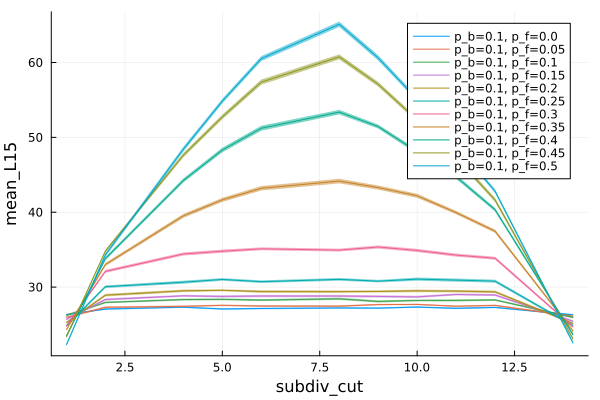

In [151]:
p_b_ind = 3
p_b = model_data["p_b_arr"][p_b_ind]
stat = "mean"
L = "L15"
ribbon = "err"

p_f_ind = 1
p_f = model_data["p_f_arr"][p_f_ind]
plot(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 2
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 3
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 4
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 5
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 6
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 7
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 8
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 9
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 10
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_f_ind = 11
p_f = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

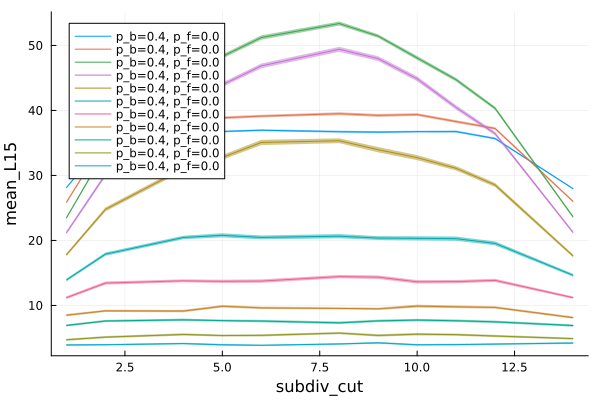

In [150]:
p_f_ind = 9
p_f = model_data["p_b_arr"][p_b_ind]
stat = "mean"
L = "L15"
ribbon = "err"

p_b_ind = 1
p_b = model_data["p_f_arr"][p_f_ind]
plot(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 2
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 3
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 4
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 5
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 6
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 7
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 8
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 9
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 10
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")

p_b_ind = 11
p_b = model_data["p_f_arr"][p_f_ind]
plot!(model_data["subdiv_array"], CUT_Stats[stat][L][p_f_ind, p_b_ind, :], ribbon= CUT_Stats[ribbon][L][p_f_ind, p_b_ind, :], xlabel="subdiv_cut", ylabel="$(stat)_$(L)", label="p_b=$(p_b), p_f=$(p_f)")
